In [1]:
import numpy as np
import tensorflow as tf
from skimage import io 
import matplotlib.pyplot as plt

C:\Users\CivilKen\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#%% process input data
import os
path = os.getcwd()
X = np.load(path+'/'+'image.npy')
Xmin = np.amin(X, axis=0)
Xmax = np.amax(X, axis=0)
Xa = np.zeros((X.shape))
Xnor = np.zeros((X.shape))
Xb = Xmax-Xmin
for i in range(len(Xmin)):
  Xa[:,i] = X[:,i]-Xmin[i]
  try:
    Xnor[:,i] = Xa[:,i]/Xb[i]
  except:
    Xnor[:,i] = 0
  

C:\Users\CivilKen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [4]:
X = X.astype('float32')/255.

In [5]:
x_train = X
y_train = X

In [6]:
#%% define layer
def add_layer(inputs, in_size, out_size, keep_prob, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(tf.random_normal([in_size, out_size],stddev=0.01))
    biases = tf.Variable(tf.zeros([1, out_size]))
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    #Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    outputs = tf.nn.dropout(outputs, keep_prob)
    return outputs

In [7]:
# define placeholder for inputs to network
keep_prob = tf.placeholder(tf.float32)
xs = tf.placeholder(tf.float32, [None, 784])
ys = tf.placeholder(tf.float32, [None, 784])

In [8]:
# add hidden layer
l1 = add_layer(xs, 784, 512, keep_prob, activation_function=tf.nn.relu)
l2 = add_layer(l1,512,256,keep_prob, activation_function=tf.nn.relu)
l3 = add_layer(l2,256,64,keep_prob, activation_function=tf.nn.relu)
bottle = add_layer(l3, 64, 16, 1.0, activation_function=None)
l4 = add_layer(bottle,16,64,keep_prob, activation_function=tf.nn.relu)
l5 = add_layer(l4,64,256,keep_prob, activation_function=tf.nn.relu)
l6 = add_layer(l5,256,512,keep_prob, activation_function=tf.nn.relu)
prediction = add_layer(l6, 512, 784, keep_prob, activation_function=None)

In [9]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),reduction_indices=[1]))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)

In [10]:
#%% training step
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

TrainLoss=[]
epoch=[]
for i in range(5000):
    # training
    idx = np.random.choice(np.arange(len(x_train)), 128, replace=False)
    x_train_batch = x_train[idx]
    y_train_batch = y_train[idx]
    sess.run(train_step, feed_dict={xs: x_train_batch, ys: y_train_batch, keep_prob: 1.0})
    if i % 20 == 0:     
        train_loss = sess.run(loss, feed_dict={xs: x_train, ys: y_train, keep_prob: 1})
        print("epoch",i,"Train Loss=",train_loss,)
        TrainLoss.append(train_loss)
        epoch.append(i)

epoch 0 Train Loss= 129.73206
epoch 20 Train Loss= 90.07942


KeyboardInterrupt: 

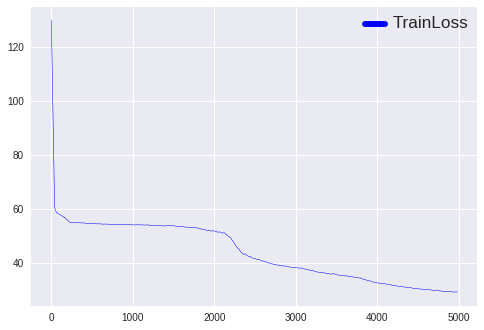

In [0]:
#%% plot loss
fig = plt.figure()
# 111代表在subplot圖中的位置
ax = fig.add_subplot(111)
ax.plot(epoch, TrainLoss, c='b', label='TrainLoss', linewidth=0.5)
leg = plt.legend()
# get the lines and texts inside legend box
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()
# bulk-set the properties of all lines and texts
plt.setp(leg_lines, linewidth=6)
plt.setp(leg_texts, fontsize='x-large')
plt.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


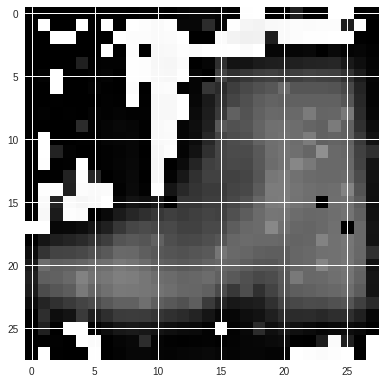

In [0]:
#%% plot reconstructed images
recon_img = sess.run(prediction, feed_dict={xs: x_train, keep_prob: 1})

recon_img = (recon_img*255).astype(np.uint8)

xtest2 = np.resize(recon_img[30,:],(28,28))
io.imshow(xtest2)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


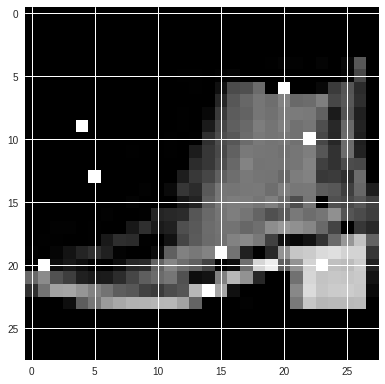

In [0]:
xtest = np.resize(X[30,:],(28,28))
io.imshow(xtest)

In [0]:
# Add ops to save the variables.
saver = tf.train.Saver()
save_path = saver.save(sess, path+"/model.ckpt")